In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import hickle as hkl
import time
import datetime

from matplotlib.animation import FuncAnimation
import psutil
import collections
import os
from IPython.display import clear_output

In [2]:
# 计算空间三角形面积公式
# calculate the triangle area
def heron(a,b,c):  
    s = (a + b + c) / 2   
    area = (s*(s-a) * (s-b)*(s-c)) ** 0.5        
    return area

def distance3d(x1,y1,z1,x2,y2,z2):    
    a=(x1-x2)**2+(y1-y2)**2 + (z1-z2)**2
    d= a ** 0.5  
    return d  

def areatriangle3d(x1,y1,z1,x2,y2,z2,x3,y3,z3):  
    a=distance3d(x1,y1,z1,x2,y2,z2)  
    b=distance3d(x2,y2,z2,x3,y3,z3)  
    c=distance3d(x3,y3,z3,x1,y1,z1)  
    A = heron(a,b,c)  
    print("area of triangle is %r " %A)
    
def areatriangle3d_By_Points(p1,p2,p3,w,h):  
    x1 = p1.x*w
    y1 = p1.y*h
    z1 = p1.z*w
    
    x2 = p2.x*w
    y2 = p2.y*h
    z2 = p2.z*w
    
    x3 = p3.x*w
    y3 = p3.y*h
    z3 = p3.z*w
    
#     z1 = 0
#     z2 = 0
#     z3 = 0
    a=distance3d(x1,y1,z1,x2,y2,z2)  
    b=distance3d(x2,y2,z2,x3,y3,z3)  
    c=distance3d(x3,y3,z3,x1,y1,z1)  
    A = heron(a,b,c)
#     print("area of triangle is %r " %A)
    return A

def areatriangle3d_By_Points_scale(p1,p2,p3):  
    x1 = p1.x
    y1 = p1.y
    z1 = p1.z
    
    x2 = p2.x
    y2 = p2.y
    z2 = p2.z
    
    x3 = p3.x
    y3 = p3.y
    z3 = p3.z
    a=distance3d(x1,y1,z1,x2,y2,z2)  
    b=distance3d(x2,y2,z2,x3,y3,z3)  
    c=distance3d(x3,y3,z3,x1,y1,z1)  
    A = heron(a,b,c)
#     print("area of triangle is %r " %A)
    return A

def areatriangle3d_sum(hand_landmarks,w,h): 
    extract_point = [4,8,12,16,20]
    p = []
    for i in extract_point:
        p.append(hand_landmarks.landmark[i])
    a1 = areatriangle3d_By_Points(p[0],p[1],p[2],w,h)
    a2 = areatriangle3d_By_Points(p[0],p[2],p[3],w,h)
    a3 = areatriangle3d_By_Points(p[0],p[3],p[4],w,h)
    
    a = a1+a2+a3
    return a

# 计算2d三角形面积公式
def heron(a,b,c):  
    s = (a + b + c) / 2   
    area = (s*(s-a) * (s-b)*(s-c)) ** 0.5        
    return area

def distance2d(x1,y1,z1,x2,y2,z2):    
    a=(x1-x2)**2+(y1-y2)**2
    d= a ** 0.5  
    return d  

def areatriangle2d(x1,y1,z1,x2,y2,z2,x3,y3,z3):  
    a=distance2d(x1,y1,z1,x2,y2,z2)  
    b=distance2d(x2,y2,z2,x3,y3,z3)  
    c=distance2d(x3,y3,z3,x1,y1,z1)  
    A = heron(a,b,c)  
    print("area of triangle is %r " %A)
    
def areatriangle2d_By_Points(p1,p2,p3,w,h):  
    x1 = p1.x*w
    y1 = p1.y*h
    z1 = p1.z*w
    
    x2 = p2.x*w
    y2 = p2.y*h
    z2 = p2.z*w
    
    x3 = p3.x*w
    y3 = p3.y*h
    z3 = p3.z*w
    
#     z1 = 0
#     z2 = 0
#     z3 = 0
    a=distance2d(x1,y1,z1,x2,y2,z2)  
    b=distance2d(x2,y2,z2,x3,y3,z3)  
    c=distance2d(x3,y3,z3,x1,y1,z1)  
    A = heron(a,b,c)
    return A


def areatriangle2d_sum(hand_landmarks,w,h): 
    extract_point = [4,8,12,16,20]
    p = []
    for i in extract_point:
        p.append(hand_landmarks.landmark[i])
    a1 = areatriangle2d_By_Points(p[0],p[1],p[2],w,h)
    a2 = areatriangle2d_By_Points(p[0],p[2],p[3],w,h)
    a3 = areatriangle2d_By_Points(p[0],p[3],p[4],w,h)
    
    a = a1+a2+a3
    return a


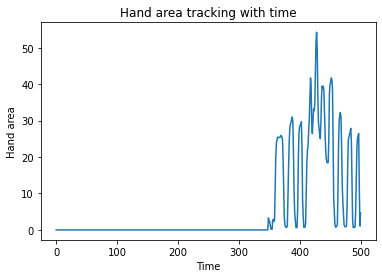

/Users/ben/opt/anaconda3/lib/python3.8/site-packages/hickle/loaders/load_builtins.py:109: SerializedWarning: 'NormalizedLandmarkList' type not understood, data has been serialized
  warnings.warn("%r type not understood, data has been serialized%s"


In [3]:
# 按照 时间, index, 存储 坐标和图像信息, 读取并重新画图分析
# test the 2D hand area plot in the video stream

# start the camera and caputure the hand area and plot
# press ESC key, exit and save the video and data

now = datetime.datetime.now()
data_s = []
index_s = []
time_s = []
result_s = []
image_s = []
idx = 0

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands


hand_area = collections.deque(np.zeros(500))
hand_z = collections.deque(np.zeros(500))

hand_z1 = collections.deque(np.zeros(500))
hand_z2 = collections.deque(np.zeros(500))
hand_z3 = collections.deque(np.zeros(500))
hand_z4 = collections.deque(np.zeros(500))
    
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
#     model_complexity=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    ts = time.time()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)
    image_height, image_width, _ = image.shape
    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    

    
    if results.multi_hand_landmarks:
      #     save data
      index_s.append(idx)
      time_s.append(ts)
      result_s.append(results.multi_hand_landmarks)
      image_s.append(image)
      for hand_landmarks in results.multi_hand_landmarks:
        clear_output(wait=True)
        hand_area.popleft()
        hand_z.popleft()
        area = areatriangle2d_sum(hand_landmarks,image_width,image_height)
        hand_area.append(area/1000)
        hand_z.append(hand_landmarks.landmark[4].z)
        
        plt.plot(hand_area)
        plt.title("Hand area tracking with time")
        plt.xlabel("Time")
        plt.ylabel("Hand area")
    
        plt.show()
        
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    idx = idx + 1
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)

data_s.append(index_s)  
data_s.append(time_s)

data_s.append(result_s) # when the lendmark is not null, store the result with
data_s.append(image_s)

fname = str(now.year)+'-'+str(now.month)+'-'+str(now.day)+'-'+str(now.hour)+'-'+str(now.minute)+'-'+str(now.second)
# 2015 5 6 8 53 40
# Dump data, with compression
hkl.dump(data_s, fname+'_gzip.hkl', mode='w', compression='gzip')

# The leandmark point in each frame

Hand landmark show like in this image. 

![Drag Racing](https://google.github.io/mediapipe/images/mobile/hand_landmarks.png)

## MULTI_HAND_LANDMARKS

Collection of detected/tracked hands, where each hand is represented as a list of 21 hand landmarks and each landmark is composed of x, y and z. x and y are normalized to [0.0, 1.0] by the image width and height respectively. z represents the landmark depth with the depth at the wrist being the origin, and the smaller the value the closer the landmark is to the camera. The magnitude of z uses roughly the same scale as x.

In [10]:
print(hand_landmarks)

landmark {
  x: 0.6954987645149231
  y: 0.9087715148925781
  z: -0.00014768558321520686
}
landmark {
  x: 0.742023766040802
  y: 0.8824712038040161
  z: -0.025664640590548515
}
landmark {
  x: 0.7733997702598572
  y: 0.8687179684638977
  z: -0.05751359090209007
}
landmark {
  x: 0.7893792986869812
  y: 0.8821390271186829
  z: -0.0865042582154274
}
landmark {
  x: 0.8028308749198914
  y: 0.9095126986503601
  z: -0.11844556778669357
}
landmark {
  x: 0.7333595156669617
  y: 0.8309553861618042
  z: -0.09091813862323761
}
landmark {
  x: 0.7256593108177185
  y: 0.8065596222877502
  z: -0.10868236422538757
}
landmark {
  x: 0.724388599395752
  y: 0.8556262850761414
  z: -0.10858149826526642
}
landmark {
  x: 0.7247098684310913
  y: 0.899039626121521
  z: -0.10754294693470001
}
landmark {
  x: 0.6968500018119812
  y: 0.8552150130271912
  z: -0.08577681332826614
}
landmark {
  x: 0.6850490570068359
  y: 0.8259783983230591
  z: -0.10654684901237488
}
landmark {
  x: 0.6908851861953735
  y: 0.8

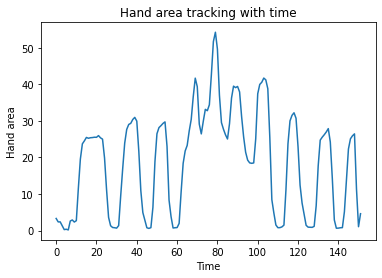

In [6]:
# data read and show with video image 
# read the data saved in the above
data_r = hkl.load('2021-10-31-15-9-42_gzip.hkl')

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# hand_area = collections.deque(np.zeros(500))
hand_area = []

time_r = data_r[1]
result_r = data_r[2]
image_r = data_r[3]

image_height, image_width, _ = image_r[0].shape

idx = 0

for i in result_r:
    for hand_landmarks in i:
        image = image_r[idx]
        clear_output(wait=True)
#         hand_area.popleft()
        area = areatriangle2d_sum(hand_landmarks,image_width,image_height)
        hand_area.append(area/1000)


        plt.plot(hand_area)
        plt.title("Hand area tracking with time")
        plt.xlabel("Time")
        plt.ylabel("Hand area")
        plt.show()

        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
        # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if idx < len(time_r)-2:
        time.sleep(time_r[idx+1]-time_r[idx])
    idx = idx + 1
    if cv2.waitKey(5) & 0xFF == 27:
        break
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)

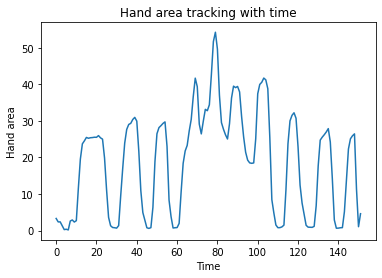

In [8]:
# data read and show with video image without background
# read the data saved in the above
data_r = hkl.load('2021-10-31-15-9-42_gzip.hkl')

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# hand_area = collections.deque(np.zeros(500))
hand_area = []

time_r = data_r[1]
result_r = data_r[2]
image_r = data_r[3]

image_height, image_width, _ = image_r[0].shape

idx = 0

for i in result_r:
    for hand_landmarks in i:
#         image = image_r[idx]
        image = np.zeros((image_height,image_width,_))
        clear_output(wait=True)
#         hand_area.popleft()
        area = areatriangle2d_sum(hand_landmarks,image_width,image_height)
        hand_area.append(area/1000)


        plt.plot(hand_area)
        plt.title("Hand area tracking with time")
        plt.xlabel("Time")
        plt.ylabel("Hand area")
        plt.show()

        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
        # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if idx < len(time_r)-2:
        time.sleep(time_r[idx+1]-time_r[idx])
    idx = idx + 1
    if cv2.waitKey(5) & 0xFF == 27:
        break
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)

In [9]:
print(image_r[0].shape)

(720, 1280, 3)
